# **Week 12 Competition**

### Domain of the competition : Election

### **Milestones completed**

- [x] Data collection. (10 Points)
- [x] Pre-processing. (Choose atleast 3 options out of the following 6) (30 Points)
    - [x] Missing value handling.
    - [ ] Outlier detection and handling.
    - [x] Encoding
    - [x] Feature reduction
    - [x] Standardization/normalization
    - [ ] Feature engineering
- [x] Exploratory Data Analysis. (20 Points)
    - Univariate analysis
    - Bivariate analysis
- [x] Modelling. (20 Points)
- [x] Model fine tuning (20 Points)

## Task 01

*Data collection & Initial analysis.*

#### We choosen **U.S. President 1976–2020** Dataset for our case study from Harward dataverse. This data file contains constituency (state-level) returns for elections to the U.S. presidency from 1976 to 2020. You can access the original file from Harward dataverse via this [link](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/42MVDX). Also a soft copy of the same file is attched along with this commit.

Importing necessary libraries

In [2]:
# Importing Numpy as np
import numpy as np
# Importing pandas as pd
import pandas as pd
# Importing Matplotlibrary's PyPlot as plt
import matplotlib.pyplot as plt
# Importing seaborn as sns
import seaborn as sns
# Importing sklearn
import sklearn

In [70]:
# Reading the csv file into Pandas Dataframe 
EData = pd.read_csv('1976-2020-president.csv')
# Displaying the first 5 rows
EData.head(5)

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,0,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,0,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,0,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,0,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,0,1954,1182850,20210113,NaN,OTHER


In [71]:
# Getting the basic details of the dataframe
EData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              4287 non-null   int64  
 1   state             4287 non-null   object 
 2   state_po          4287 non-null   object 
 3   state_fips        4287 non-null   int64  
 4   state_cen         4287 non-null   int64  
 5   state_ic          4287 non-null   int64  
 6   office            4287 non-null   object 
 7   candidate         4000 non-null   object 
 8   party_detailed    3831 non-null   object 
 9   writein           4284 non-null   float64
 10  candidatevotes    4287 non-null   int64  
 11  totalvotes        4287 non-null   int64  
 12  version           4287 non-null   int64  
 13  notes             0 non-null      float64
 14  party_simplified  4287 non-null   object 
dtypes: float64(2), int64(7), object(6)
memory usage: 502.5+ KB


In [3]:
# Checking for Null values
EData.isna().sum().to_frame('Null value count')

,Null value count
year,0
state,0
state_po,0
state_fips,0
state_cen,0
state_ic,0
office,0
candidate,287
party_detailed,456
writein,3


In [7]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [6]:
EData.describe()

,year,state_fips,state_cen,state_ic,writein,candidatevotes,totalvotes,version,notes
count,4287.00,4287.00,4287.00,4287.00,4284.00,4287.00,4287.00,4287.00,0.00
mean,1999.08,28.62,53.67,39.75,0.11,311907.59,2366924.15,20210113.00,NaN
std,14.22,15.62,26.03,22.77,0.31,764801.10,2465008.31,0.00,NaN
min,1976.00,1.00,11.00,1.00,0.00,0.00,123574.00,20210113.00,NaN
25%,1988.00,16.00,33.00,22.00,0.00,1177.00,652274.00,20210113.00,NaN
50%,2000.00,28.00,53.00,42.00,0.00,7499.00,1569180.00,20210113.00,NaN
75%,2012.00,41.00,81.00,61.00,0.00,199241.50,3033118.00,20210113.00,NaN
max,2020.00,56.00,95.00,82.00,1.00,11110250.00,17500881.00,20210113.00,NaN


In [4]:
# Checking the details of features with Object datatype
EData.describe(include=['object'])

,state,state_po,office,candidate,party_detailed,party_simplified
count,4287,4287,4287,4000,3831,4287
unique,51,51,1,270,172,4
top,COLORADO,CO,US PRESIDENT,"NADER, RALPH",REPUBLICAN,OTHER
freq,149,149,4287,137,613,2524


In [75]:
test_cols =['state_fips', 'state_cen', 'state_ic']
for i in test_cols:
    print("Unique value count of", i,"feature is", EData[i].nunique())

Unique value count of state_fips feature is 51
Unique value count of state_cen feature is 51
Unique value count of state_ic feature is 51


### Insights :
* Our Dataframe contains the 51 state returns for elections to the U.S. presidency from 1976 to 2020.
* 3 Columns (candidate (287), party_detailed (456) & notes(4287)) contain Null values.
* Impact of the features such as "state_po", "state_fips", "state_cen" & "state_ic" are same as "state" feature. So it's safe to remove them.
*   The range of values:
      *   The **candidatevotes** ranges from **0 to 11110250**
      *   The **totalvotes** ranges from **123574 to 17500881**
* Other obsolete features are "office", "writein", "version" & "notes". Because our target variable for this Dataframe is "totalvotes", so these features are irrelevant to us!

## Task 02

*Pre-processing.*

1. Feature reduction

In [9]:
# Dropping obsolete columns
EData01 = EData.drop(columns=["state_po", "state_fips", "state_cen", "state_ic", "office", "writein", "version", "notes"])
EData01.head(5)

,year,state,candidate,party_detailed,candidatevotes,totalvotes,party_simplified
0,1976,ALABAMA,"CARTER, JIMMY",DEMOCRAT,659170,1182850,DEMOCRAT
1,1976,ALABAMA,"FORD, GERALD",REPUBLICAN,504070,1182850,REPUBLICAN
2,1976,ALABAMA,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,9198,1182850,OTHER
3,1976,ALABAMA,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,6669,1182850,OTHER
4,1976,ALABAMA,"HALL, GUS",COMMUNIST PARTY USE,1954,1182850,OTHER


In [79]:
# Getting a sample preview of Null values in the Dataframe
EData01[EData01.isnull().any(axis=1)].sample(5)

,year,state,candidate,party_detailed,candidatevotes,totalvotes,party_simplified
536,1980,NEW HAMPSHIRE,NaN,NaN,68,383990,OTHER
2730,2008,ALABAMA,NaN,INDEPENDENT,16089,2099819,OTHER
2336,2000,SOUTH CAROLINA,NaN,CONSTITUTION PARTY,1682,1383902,OTHER
2881,2008,MASSACHUSETTS,BLANK VOTE/SCATTERING,NaN,22010,3102995,OTHER
2116,2000,FLORIDA,NaN,NaN,40,5963110,OTHER


2. Missing value handling.

### Notes :
* It's better to fill 287 missing names of out of 4000 with "Unknown" string.
* And also these unknown entries + other null values (456 values) in the party_detailed feature can be fixed by filling with "Undefined" string.

In [10]:
# Filling NaN values in candidate column with "Unknown" string
EData01.candidate.fillna("Unknown", inplace=True)
# Filling NaN values in party_detailed column with "Undefined" string
EData01.party_detailed.fillna("Undefined", inplace=True)

In [83]:
# Final Null value count status
EData01.isna().sum().to_frame('Null value count')

,Null value count
year,0
state,0
candidate,0
party_detailed,0
candidatevotes,0
totalvotes,0
party_simplified,0


3. Encoding

In [84]:
EData01.describe(include=['object'])

,state,candidate,party_detailed,party_simplified
count,4287,4287,4287,4287
unique,51,271,173,4
top,COLORADO,Unknown,REPUBLICAN,OTHER
freq,149,287,613,2524


In [85]:
EData01.sample(5)

,year,state,candidate,party_detailed,candidatevotes,totalvotes,party_simplified
3184,2012,KANSAS,Unknown,Undefined,1138,1159971,OTHER
3208,2012,MARYLAND,"OBAMA, BARACK H.",DEMOCRAT,1677844,2707327,DEMOCRAT
1782,1996,INDIANA,"PEROT, ROSS",REFORM PARTY,224299,2135431,OTHER
3218,2012,MASSACHUSETTS,OTHER,Undefined,6552,3184196,OTHER
3004,2008,RHODE ISLAND,"BALDWIN, CHARLES """"CHUCK""""",CONSTITUTION PARTY,675,471766,OTHER


In [11]:
# Getting a list of column names from feature dataframe which are suitable for label encoding
EData01_Cols = []
for i in list(EData01.columns):
    if EData01[i].dtype == 'O' and len(EData01[i].unique()) > 2:
        EData01_Cols.append(i)
        
print('The below given list of columns needs a Label Encoding:\n',EData01_Cols)

The below given list of columns needs a Label Encoding:
 ['state', 'candidate', 'party_detailed', 'party_simplified']


**Since the above mentioned object type columns contains more than 2 variables, it's better to perform a label encoding.**

In [12]:
# Creating a label encoded dataframe of the targeted columns with the help of LabelEncoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
Label_Enc= LabelEncoder()
temp_df=pd.DataFrame()
temp_df2=pd.DataFrame()
for k in EData01_Cols:
    l=EData01[k].values
    l=Label_Enc.fit_transform(l)
    temp_df2=pd.DataFrame(l, columns=[str(k)])
    temp_df = pd.concat([temp_df, temp_df2], axis=1)

In [13]:
# Replacing the original columns in the feature dataframe with encoded columns
import warnings
warnings.filterwarnings("ignore")
EData01[EData01_Cols]=temp_df[EData01_Cols]
# Sample preview of the feature dataframe
EData01.sample(5)

,year,state,candidate,party_detailed,candidatevotes,totalvotes,party_simplified
3966,2020,17,257,106,1,2136768,2
73,1976,13,89,33,9250,4721282,2
3654,2016,37,242,132,782403,2001336,3
478,1980,20,45,82,14192,1540496,1
1185,1988,30,106,169,1020,3099553,2


4. Standardization/normalization

**Going to perform during Model creation & Fine tuning**

## Task 03

*Exploratory Data Analysis.*

1. Pie Chart representing the Vote share of Major parties

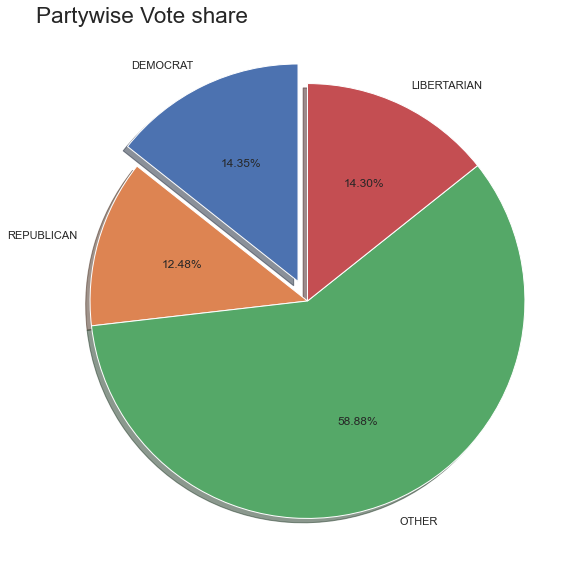

In [102]:
# Variable for plot
explode = (0.1, 0, 0, 0)
# Plotting a pie diagram
fig = plt.figure(figsize=(10, 10))
plt.pie(EData01.loc[:,['party_simplified']].groupby('party_simplified').size(), explode=explode, shadow=True, startangle=90, labels = list(EData01.party_simplified.unique()), autopct='%1.2f%%')
plt.title(label="Partywise Vote share",
          loc="left",
          fontsize=22.5)

plt.show()

2. Time based Line plot of Polling volume

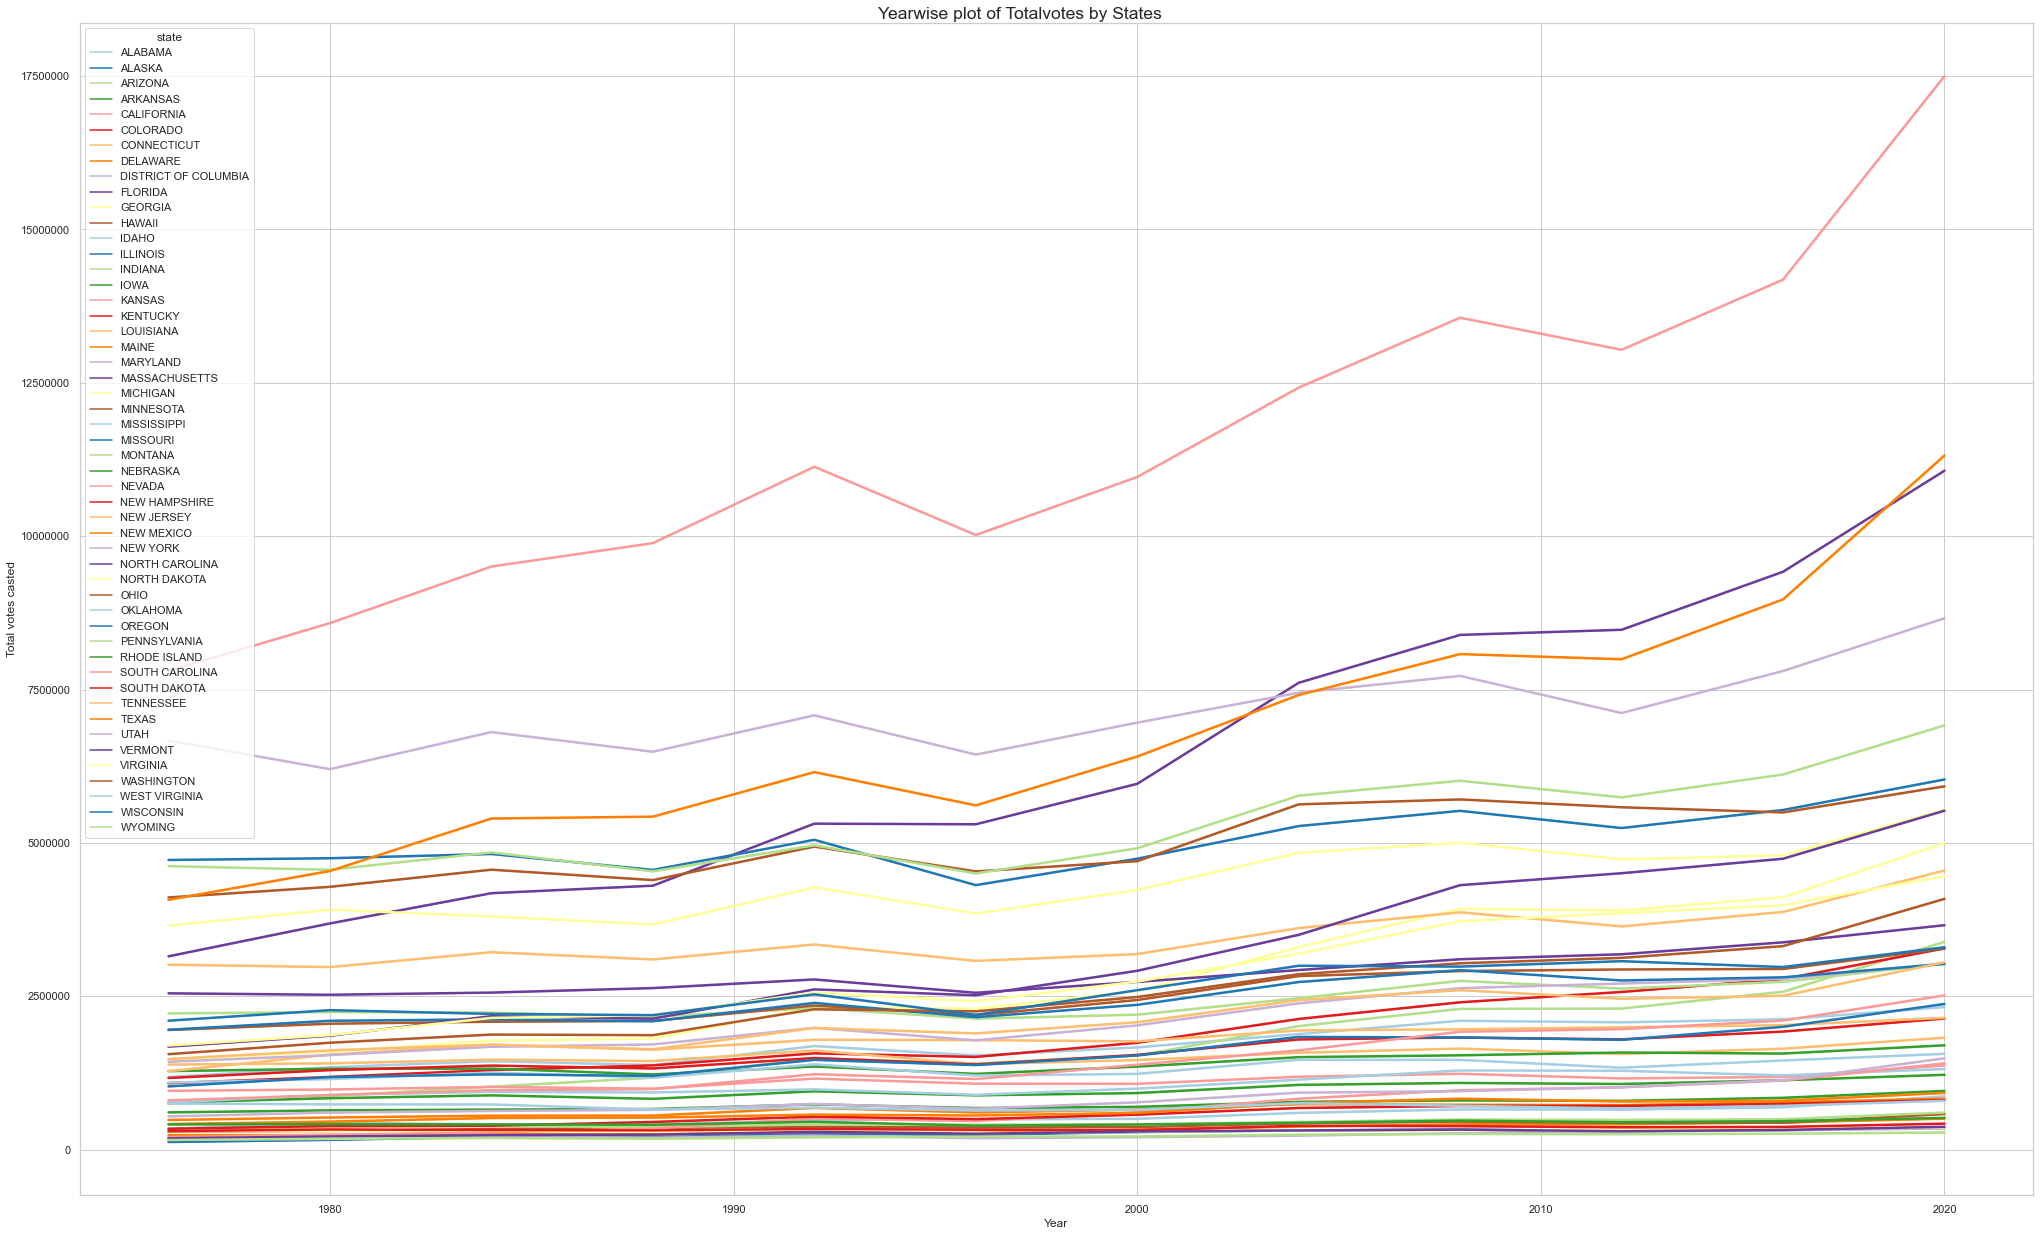

In [100]:
sns.set_theme(style="whitegrid")
# Initialize the figure
f, ax = plt.subplots(figsize=(28.5, 17.5))
f.suptitle('Yearwise plot of Totalvotes by States', fontsize=17.5)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
sns.lineplot(data=EData01, x="year", y="totalvotes", hue="state", palette="Paired", linewidth=2.5)
ax.set_ylabel('Total votes casted')
ax.set_xlabel('Year')
f.tight_layout()

3. Heatmap of Correlation matrix of the features

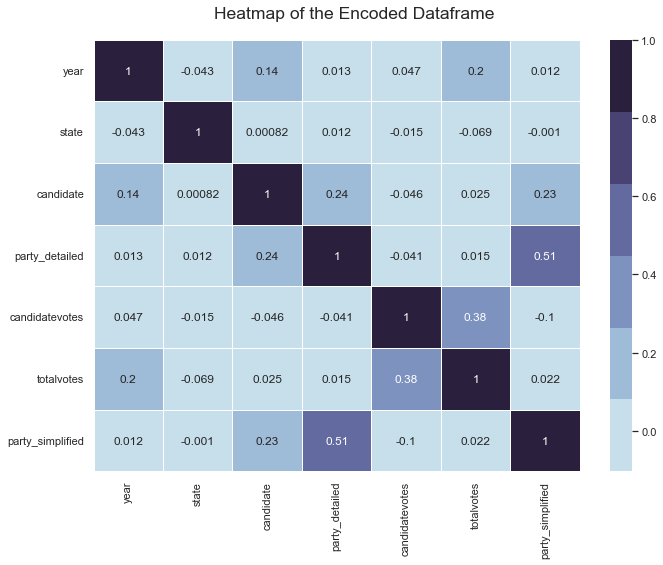

In [125]:
# Calculating the Correlation matrix using DataFrame.corr()
corrmatrix = EData01.corr()
# Creating Heatmap using seaborn & Correlation matrix
f, ax = plt.subplots(figsize=(10, 8))
f.suptitle('Heatmap of the Encoded Dataframe', fontsize=17.5)
colormap = sns.color_palette('ch:s=.25,rot=-.25')
sns.heatmap(corrmatrix, annot=True, linewidth=0.75, cmap=colormap)
f.tight_layout()

### Insights :
* When we analyse the party vise vote share, majority of it covered by the other category. But when we consider the rest of the major 3 parties, Democrats are the real player among them.
* Most of the states in US show an upward trend in the interest in Election.
* Candidate votes & Year are much highly correlated with our target variable - Totalvotes.

## Task 04 & 05

*Modelling & Model fine tuning*

In [14]:
# Splitting the Dataframe
# Independent variables
X = EData01.drop(['totalvotes'], axis=1)
# Dependent variables
y = EData01.totalvotes

In [15]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,  test_size = 0.20, random_state=42)

Importing necessary modules from SkLearn Library

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

**Here we are comparing the efficiency of 4 Regression models such as Linear, KNN, Decision tree & Gradient Boosting Regressor with R2 Score**

In [168]:
stages = []
stages.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
stages.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
stages.append(('ScaledDTR', Pipeline([('Scaler', StandardScaler()),('DTR', DecisionTreeRegressor())])))
stages.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
results = []
names = []
for name, model in stages:
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    Model_list = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print("R2 Score of",Model_list)

R2 Score of ScaledLR: 0.178603 (0.077145)
R2 Score of ScaledKNN: 0.205421 (0.123221)
R2 Score of ScaledDTR: 0.758515 (0.049234)
R2 Score of ScaledGBM: 0.866220 (0.018242)


**Out of the 4 Models GRB Outperformed others! So we are good to select the GRB as our main model**

### Gradient Boosting Regressor Model

**Now we are checking the efficiency of the GRB Model with some fine tuning methods**

Checking the GRB Model's R2 Score for various values of n_estimators

In [169]:
scaler = StandardScaler().fit(X_train)
X_Scaled = scaler.transform(X_train)
parameter_grid = dict(n_estimators=np.array([50,100,200,300,400]))
GBModel = GradientBoostingRegressor(random_state=42)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
grid = GridSearchCV(estimator=GBModel, param_grid=parameter_grid, scoring='r2', cv=kfold)
grid_result = grid.fit(X_Scaled, y_train)
Means = grid_result.cv_results_['mean_test_score']
Stds = grid_result.cv_results_['std_test_score']
Parameters = grid_result.cv_results_['params']
for mean, stdev, param in zip(Means, Stds, Parameters):
    print("R2 Score","%f (%f) with: %r" % (mean, stdev, param))

print("Perfect out of them: %f paired with %s" % (grid_result.best_score_, grid_result.best_params_))

R2 Score 0.731065 (0.031379) with: {'n_estimators': 50}
R2 Score 0.866311 (0.018179) with: {'n_estimators': 100}
R2 Score 0.941022 (0.008255) with: {'n_estimators': 200}
R2 Score 0.960985 (0.004708) with: {'n_estimators': 300}
R2 Score 0.970145 (0.003149) with: {'n_estimators': 400}
Perfect out of them: 0.970145 paired with {'n_estimators': 400}


## Task 4.4

*Standard scaling*

In [17]:
# Standard scaling the Dataset
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=42, n_estimators=400)
model.fit(X_train_scaled, y_train)

# Transforming the dataset for validation
X_test_scaled = scaler.transform(X_test)
Predictions = model.predict(X_test_scaled)
print ("R Squared value of our valuation is:", r2_score(y_test, Predictions))

R Squared value of our valuation is: 0.9738903407004944


**Our final Model's Efficiency (R2 score) is about 97%, Let's validate our result with some comparison with test data**

### Final Comparison

In [188]:
validator = pd.DataFrame({'Predicted Data': Predictions, 'Test Data' : y_test})
validator.sample(10)

,Predicted Data,Test Data
101,1234625,957845
2601,806221,678287
1198,6584671,6485683
507,892799,891750
768,649677,411144
2788,750829,265853
3431,2629533,2780220
3950,2044667,1372303
3305,4770476,5580822
4141,3895018,5524802


## Summary
**The difference is quite negligible when we compare the prediction data with the test data. So we can conclude that GRB is the best suitable SkLeran Regression model for our Dataset!**

*End of the file reached*